In [2]:
#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *

Cores:  12


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/uqapp/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/im

Done.


In [4]:
#Install autograd
!conda install -c omnia autograd


Solving environment: failed

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/free/noarch/repodata.json.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

ConnectionError(MaxRetryError("HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/free/noarch/repodata.json.bz2 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x10a914dd8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"))




In [3]:
%pylab inline

import pandas as pd

from autograd import grad
import autograd.numpy as np


def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X



Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'autograd'

In [29]:
def wTx(w, x):
    return np.dot(x, w)

def sigmoid_range(z,bottom,top):
#    return 1./(1+np.exp(-z))
    return bottom + (top - bottom) / (1 + np.exp(-z))

def sigmoid_range_inverse(y, bottom,top):
    return np.log((y - bottom) / (top - y))

def custom_predictions(w, x):
    predictions = sigmoid_range(wTx(w, x),1,49)
    return predictions
#     global i
#     if ( i < 10 ):
#         print(X)
#     print(predictions)
#     return predictions.clip(eps, 1-eps)

def custom_loss(y, y_predicted):
    return -(y*np.log(y_predicted) - (1-y)*np.log(1-y_predicted)**2).mean()

i = 0
def custom_loss_given_weights(w):
#     global i
#     if ( i < 10 ):
#         i = i + 1
#         print(X)
    y_predicted = custom_predictions(w, X)
    y_matched = y_predicted[np.abs(y_predicted-y).argmin()]
    return custom_loss(y_matched, y_predicted)
    
gradient = grad(custom_loss_given_weights)

In [1]:
X = np.array([
    [ 0.3213,  0.4856,  0.2995,  2.5044],
    [ 0.3005,  0.4757,  0.2974,  2.4691],
    [ 0.5638,  0.8005,  0.3381,  2.3102],
    [ 0.5281,  0.6542,  0.3129,  2.1298],
    [ 0.3221,  0.5126,  0.3085,  2.6147],
    [ 0.3055,  0.4885,  0.289 ,  2.4957],
    [ 0.3276,  0.5185,  0.3218,  2.6013],
    [ 0.5313,  0.7028,  0.3266,  2.1543],
    [ 0.4728,  0.6399,  0.3062,  2.0597],
    [ 0.3221,  0.5126,  0.3085,  2.6147]
])
y = np.array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0.])
print(sum(y))
weights = np.zeros(X.shape[1])
eps = 1e-15


NameError: name 'np' is not defined

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


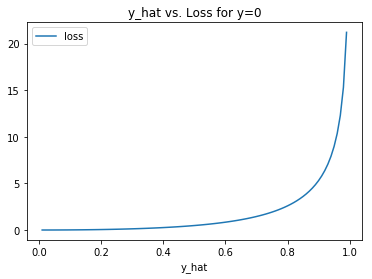

In [24]:
df = pd.DataFrame(
    [(y_hat, custom_loss(False, y_hat)) for y_hat in np.linspace(0, 1, 101)],
    columns=['y_hat', 'loss']
).plot(x='y_hat', title='y_hat vs. Loss for y=0')

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


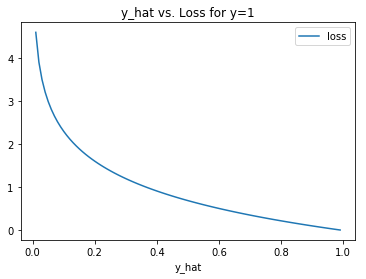

In [19]:
df = pd.DataFrame(
    [(y_hat, custom_loss(True, y_hat)) for y_hat in np.linspace(0, 1, 101)],
    columns=['y_hat', 'loss']
).plot(x='y_hat', title='y_hat vs. Loss for y=1')

In [25]:
for i in range(1000):
    if i % 100 == 0:
        print('Iteration %-4d | Loss: %.4f' % (i, custom_loss_given_weights(weights)))
    weights -= gradient(weights) * .05

[[0.3213 0.4856 0.2995 2.5044]
 [0.3005 0.4757 0.2974 2.4691]
 [0.5638 0.8005 0.3381 2.3102]
 [0.5281 0.6542 0.3129 2.1298]
 [0.3221 0.5126 0.3085 2.6147]
 [0.3055 0.4885 0.289  2.4957]
 [0.3276 0.5185 0.3218 2.6013]
 [0.5313 0.7028 0.3266 2.1543]
 [0.4728 0.6399 0.3062 2.0597]
 [0.3221 0.5126 0.3085 2.6147]]
[[0.3213 0.4856 0.2995 2.5044]
 [0.3005 0.4757 0.2974 2.4691]
 [0.5638 0.8005 0.3381 2.3102]
 [0.5281 0.6542 0.3129 2.1298]
 [0.3221 0.5126 0.3085 2.6147]
 [0.3055 0.4885 0.289  2.4957]
 [0.3276 0.5185 0.3218 2.6013]
 [0.5313 0.7028 0.3266 2.1543]
 [0.4728 0.6399 0.3062 2.0597]
 [0.3221 0.5126 0.3085 2.6147]]
[0.67843896 0.68994334 0.23003813 0.34922704 0.67415797 0.6567966
 0.6910509  0.31656805 0.36570729 0.67415797]
Iteration 0    | Loss: 0.4811
[[0.3213 0.4856 0.2995 2.5044]
 [0.3005 0.4757 0.2974 2.4691]
 [0.5638 0.8005 0.3381 2.3102]
 [0.5281 0.6542 0.3129 2.1298]
 [0.3221 0.5126 0.3085 2.6147]
 [0.3055 0.4885 0.289  2.4957]
 [0.3276 0.5185 0.3218 2.6013]
 [0.5313 0.7028 0.3

 0.69107181 0.31657547 0.36571831 0.67415408] and 1 tape(s)
Autograd ArrayNode with value [0.67844534 0.68995526 0.23000815 0.34923338 0.67415406 0.65678206
 0.6910719  0.31657551 0.36571836 0.67415406] and 1 tape(s)
Autograd ArrayNode with value [0.67844537 0.68995532 0.23000801 0.34923341 0.67415405 0.65678199
 0.69107199 0.31657554 0.36571841 0.67415405] and 1 tape(s)
Autograd ArrayNode with value [0.6784454  0.68995537 0.23000788 0.34923344 0.67415403 0.65678193
 0.69107209 0.31657557 0.36571846 0.67415403] and 1 tape(s)
Autograd ArrayNode with value [0.67844543 0.68995542 0.23000775 0.34923347 0.67415401 0.65678187
 0.69107218 0.3165756  0.36571851 0.67415401] and 1 tape(s)
Autograd ArrayNode with value [0.67844545 0.68995547 0.23000762 0.34923349 0.674154   0.6567818
 0.69107227 0.31657564 0.36571856 0.674154  ] and 1 tape(s)
Autograd ArrayNode with value [0.67844548 0.68995553 0.23000749 0.34923352 0.67415398 0.65678174
 0.69107236 0.31657567 0.3657186  0.67415398] and 1 tape(s)

 0.69109253 0.31658282 0.36572924 0.67415023] and 1 tape(s)
Autograd ArrayNode with value [0.67845164 0.68996703 0.22997857 0.34923962 0.67415021 0.65676771
 0.69109262 0.31658286 0.36572929 0.67415021] and 1 tape(s)
Autograd ArrayNode with value [0.67845166 0.68996708 0.22997844 0.34923965 0.67415019 0.65676765
 0.69109271 0.31658289 0.36572934 0.67415019] and 1 tape(s)
Autograd ArrayNode with value [0.67845169 0.68996713 0.22997831 0.34923968 0.67415018 0.65676758
 0.69109281 0.31658292 0.36572938 0.67415018] and 1 tape(s)
Autograd ArrayNode with value [0.67845172 0.68996719 0.22997818 0.34923971 0.67415016 0.65676752
 0.6910929  0.31658295 0.36572943 0.67415016] and 1 tape(s)
Autograd ArrayNode with value [0.67845175 0.68996724 0.22997805 0.34923973 0.67415014 0.65676746
 0.69109299 0.31658299 0.36572948 0.67415014] and 1 tape(s)
Autograd ArrayNode with value [0.67845178 0.68996729 0.22997791 0.34923976 0.67415012 0.65676739
 0.69109308 0.31658302 0.36572953 0.67415012] and 1 tape(s

 0.69111306 0.31659011 0.36574007 0.67414641] and 1 tape(s)
Autograd ArrayNode with value [0.67845787 0.68997869 0.22994928 0.3492458  0.67414639 0.6567535
 0.69111316 0.31659014 0.36574011 0.67414639] and 1 tape(s)
Autograd ArrayNode with value [0.6784579  0.68997874 0.22994914 0.34924583 0.67414637 0.65675343
 0.69111325 0.31659017 0.36574016 0.67414637] and 1 tape(s)
Autograd ArrayNode with value [0.67845793 0.68997879 0.22994901 0.34924585 0.67414636 0.65675337
 0.69111334 0.31659021 0.36574021 0.67414636] and 1 tape(s)
Autograd ArrayNode with value [0.67845795 0.68997885 0.22994888 0.34924588 0.67414634 0.6567533
 0.69111343 0.31659024 0.36574026 0.67414634] and 1 tape(s)
Autograd ArrayNode with value [0.67845798 0.6899789  0.22994875 0.34924591 0.67414632 0.65675324
 0.69111352 0.31659027 0.36574031 0.67414632] and 1 tape(s)
Autograd ArrayNode with value [0.67845801 0.68997895 0.22994862 0.34924594 0.67414631 0.65675318
 0.69111362 0.3165903  0.36574036 0.67414631] and 1 tape(s)


 0.69113673 0.3165985  0.36575254 0.67414201] and 1 tape(s)
Autograd ArrayNode with value [0.67846505 0.68999212 0.22991553 0.3492529  0.67414199 0.65673712
 0.69113682 0.31659853 0.36575259 0.67414199] and 1 tape(s)
Autograd ArrayNode with value [0.67846508 0.68999218 0.2299154  0.34925292 0.67414198 0.65673705
 0.69113691 0.31659857 0.36575264 0.67414198] and 1 tape(s)
Autograd ArrayNode with value [0.6784651  0.68999223 0.22991527 0.34925295 0.67414196 0.65673699
 0.691137   0.3165986  0.36575269 0.67414196] and 1 tape(s)
Autograd ArrayNode with value [0.67846513 0.68999228 0.22991514 0.34925298 0.67414194 0.65673692
 0.69113709 0.31659863 0.36575274 0.67414194] and 1 tape(s)
Autograd ArrayNode with value [0.67846516 0.68999233 0.22991501 0.34925301 0.67414192 0.65673686
 0.69113719 0.31659866 0.36575279 0.67414192] and 1 tape(s)
Autograd ArrayNode with value [0.67846519 0.68999238 0.22991488 0.34925303 0.67414191 0.6567368
 0.69113728 0.3165987  0.36575283 0.67414191] and 1 tape(s)

In [5]:
def store_prediction(mrt, model, f, scaler=None, name='unnamed'):
    def getAllData(df):
        drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
        X = df.drop(drop_cols, axis=1)
#        print(df.head())
        use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
        X = df[use_cols]
        return X

    test_data = mtr.get_test_data()
    X = mtr.modified_dataset(getAllData(test_data)) #
#    X = getAdjustedDataF(test_data,f)


    if ( scaler == None ):
        Z = X
    else:
        scaler.fit(X)
        Z = scaler.transform(X)

    predictions = model.predict(Z)

    dfResult= pd.DataFrame(predictions, columns=['N1', 'N2', 'N3', 'N4', 'N5','N6', 'N7'])
#    mtr.print_predictions(dfResult)

    global df_predictions
    global prev_r
    r = mtr.getAccuracyCount(np.array(dfResult)) ;
#    if ( r > prev_r ):
#        df_predictions = []
    df_predictions.append(dfResult)
    g_all_pred.update({name : dfResult})



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from keras.models import Input, Model
import keras
from keras.layers import Dense
import time
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

df_predictions = []


all_models = []

#all_models.append(('SVCpoly01', SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=seed)))
#all_models.append(('SVCrbf010', SVC(kernel='rbf', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf011', SVC(kernel='rbf', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf012', SVC(kernel='rbf', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0103', SVC(kernel='rbf', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0113', SVC(kernel='rbf', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0123', SVC(kernel='rbf', coef0=0.25, probability=True, degree=3, random_state=seed)))


#all_models.append(('SVCrbf020', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf021', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf022', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0203', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0213', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0223', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf030', SVC(kernel='linear', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf031', SVC(kernel='linear', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf032', SVC(kernel='linear', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0303', SVC(kernel='linear', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0313', SVC(kernel='linear', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0323', SVC(kernel='linear', coef0=0.25, probability=True, degree=3, random_state=seed)))



# all_models.append(('LR', (LogisticRegression(random_state=seed))))

#all_models.append(('KNNC', KNeighborsClassifier()))
#all_models.append(('KNNR', KNeighborsRegressor()))
#all_models.append(('RC', RidgeClassifier(random_state=seed)))
# all_models.append(('LR', LogisticRegression(random_state=seed)))
# all_models.append(('LDA', LinearDiscriminantAnalysis()))
# all_models.append(('DTR', DecisionTreeRegressor()))
# all_models.append(('ETR', ExtraTreesRegressor(n_estimators=5)))
#all_models.append(('ETC', ExtraTreesClassifier(n_estimators=5)))
# all_models.append(('EN', ElasticNet()))
#all_models.append(('CART', DecisionTreeClassifier()))
# all_models.append(('NB', GaussianNB()))
# all_models.append(('Lasso', Lasso()))
all_models.append(('GBR', GradientBoostingRegressor()))
#all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR3', RandomForestRegressor(n_estimators=3, n_jobs=5, random_state=seed)))
# all_models.append(('SGDR', SGDRegressor(random_state=seed)))
#all_models.append(('AdaB', AdaBoostClassifier(RandomForestClassifier(n_estimators=3))))
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)))

#92.45 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(490,490,490,490,490,490,490), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))


all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(780,490,780,490,780,490,280), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))





/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Loaded MyTotoResearch algo_no:  1
1521


In [ ]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

g_all_pred = {}

X = mtr.modified_dataset(getAllData(df)) #
f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

scaler = StandardScaler()
scaler = RobustScaler()
scaler.fit(X)
Z = scaler.transform(X)

for name, model in all_models:
    
    
#    scaler = None
#    Z = X

#     kfold = model_selection.KFold(n_splits=3, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, Z, mtr.getTarget(3), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    oClassifier = MultiOutputClassifier(model, n_jobs=7)
    oClassifier.fit(Z, mtr.getTargets()) 
    print(oClassifier)
    s = oClassifier.score(Z, mtr.getTargets())
    if(oClassifier.score(Z, mtr.getTargets()) == 1.0):
        print( name, ' ', str(f), ' ', str(s))
    store_prediction(mtr, oClassifier, f, scaler=scaler, name=name)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

# for n in range(len(df_predictions)):
#     print( mtr.getAccuracyCount(np.array(df_predictions[n])))
#     mtr.print_predictions(df_predictions[n])






# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

print('Done')

MultiOutputClassifier(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=7)
1.0  Time taken:  9.000000000369823e-06  


In [6]:
def combine_prediction(arr, initial_pred=[]):
    global s
    if ( isinstance(arr, list) ):
        for a in arr:
            combine_prediction(a, initial_pred)
        return 
    if ( len(s) > 1 ):
        s += '_'
    s += arr
    initial_pred.append(g_all_pred[arr])
    return 



In [ ]:
import itertools
from itertools import combinations
import operator 
from itertools import islice

name_ = []

lst = [name for name, model in all_models]
iBestIndex = -1
iBestN = []
#print("List ", lst)
top_n = 12


dict_accuracy = {}
for z in range(5, 0,-1):
    a = [list(x) for x in itertools.combinations(lst, z) if len(x) > 1 ] 
#    print(a)

    for xx in a:
        test_pred = []
        s = ''
        combine_prediction(xx, test_pred)
#        print(s)

        #print(len(test_pred))

        all_pred = [] ;
        for i in range(len(test_pred)):
            if ( i == 0 ):
                all_pred = test_pred[i]
            else:
                all_pred = np.column_stack((all_pred, test_pred[i]) )

        top_seven = []
        for i in range(len(all_pred)):
            unique, counts = np.unique(all_pred[i], return_counts=True)
            x = dict(zip(unique, counts))
            sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
            l = list(islice([int(x) for x,y in sorted_x],top_n))
            while ( len(l) < top_n ):
                l.append(-1)

            top_seven.append(l)
            

#        print(len(top_seven))
#         if(len(top_seven[0]) < top_n ):
#             print("*** Caught ", )
        columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
#        print(columns)
        df_top_seven = pd.DataFrame(top_seven, columns=columns)
        r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
        matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
        r = sum(weighted_match)

        dict_accuracy.update({s: r})

t_accuracy = sorted(dict_accuracy.items(),key=operator.itemgetter(1), reverse=True)
print('Done')


In [ ]:
matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
print(matched)
print(weighted_match)

In [ ]:
n = 7
print(t_accuracy[:n])

a = [x[0].split('_') for x in t_accuracy[:n] ] 
print(a)
for xx in a:
    test_pred = []
    s = ''
    combine_prediction(xx, test_pred)
    all_pred = [] ;
    for i in range(len(test_pred)):
        if ( i == 0 ):
            all_pred = test_pred[i]
        else:
            all_pred = np.column_stack((all_pred, test_pred[i]) )

    top_seven = []
    for i in range(len(all_pred)):
        unique, counts = np.unique(all_pred[i], return_counts=True)
        x = dict(zip(unique, counts))
        sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
        l = list(islice([int(x) for x,y in sorted_x],top_n))
        while ( len(l) < top_n ):
          l.append(-1)
        top_seven.append(l)


    columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
    df_top_seven = pd.DataFrame(top_seven, columns=columns)
    r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
    print ( "Accuracy: ",  r)
    dict_accuracy.update({s: r})
    mtr.plot_matched_counts(df_top_seven.values)




In [10]:

# Nov 26
# 16 22 28 31 38 46 33

In [ ]:
#Keep track of all results
#df_predictions = []

#print(df_predictions)
#mtr = MyTotoResearch(algo_no=1)
def getAllData(df):
#     drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
#     X = df.drop(drop_cols, axis=1)

    use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
    X = df[use_cols]
    return X

lresult, df = mtr.load_totodata()

test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAllData(test_data)) #

print(len(df_predictions))
for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])

